In [33]:
import numpy as np

class Organism:
    def __init__(self, genome=None, genome_length=10, cell_type='prokaryotic'):
        self.cell_type = cell_type
        if genome is None:
            # Prokaryotes start with simple genomes
            self.genome = np.random.rand(genome_length) * 0.5  # Simple, low-complexity genome
        else:
            self.genome = genome

    def mutate(self, mutation_rate=0.01):
        # Randomly mutate each gene with a given probability
        for i in range(len(self.genome)):
            if np.random.rand() < mutation_rate:
                self.genome[i] += np.random.normal(0, 0.1)  # Small random change
                self.genome[i] = np.clip(self.genome[i], 0, 1)  # Keep within bounds

    def crossover(self, other):
        # Crossover with another organism to produce offspring
        crossover_point = np.random.randint(1, len(self.genome) - 1)
        child_genome = np.concatenate((self.genome[:crossover_point], other.genome[crossover_point:]))
        return Organism(genome=child_genome, cell_type=self.cell_type)

    def evolve_to_eukaryotic(self):
        if self.cell_type == 'prokaryotic' and np.mean(self.genome) > 0.75:  # Arbitrary condition for evolution
            self.cell_type = 'eukaryotic'
            self.genome = np.concatenate((self.genome, np.random.rand(len(self.genome)) * 0.5))  # Increase complexity
            print("Organism evolved to eukaryotic!")


In [34]:
def fitness_function(organism, environment):
    # Match the environment to the length of the genome
    relevant_environment = environment[:len(organism.genome)]
    fitness = np.sum(organism.genome * relevant_environment)
    return fitness

def create_environment(genome_length):
    return np.random.rand(genome_length * 2)  # Environment to fit both prokaryotic and eukaryotic genomes


In [35]:
def simulate_evolution(population_size=100, generations=100, mutation_rate=0.01):
    genome_length = 10
    environment = create_environment(genome_length)  # Environment affecting evolution
    population = [Organism(genome_length=genome_length) for _ in range(population_size)]

    fitness_over_time = []

    for generation in range(generations):
        # Calculate fitness for each organism
        fitness_scores = [fitness_function(org, environment) for org in population]

        # Select the fittest organisms for reproduction
        fittest_indices = np.argsort(fitness_scores)[-population_size//2:]
        fittest_population = [population[i] for i in fittest_indices]

        # Generate the next generation
        new_population = []
        for i in range(population_size):
            parent1, parent2 = np.random.choice(fittest_population, 2)
            child = parent1.crossover(parent2)
            child.mutate(mutation_rate)
            child.evolve_to_eukaryotic()  # Attempt evolution to eukaryotic
            new_population.append(child)

        population = new_population
        avg_fitness = np.mean(fitness_scores)
        fitness_over_time.append(avg_fitness)

        print(f"Generation {generation + 1}: Avg Fitness = {avg_fitness:.2f}")

    return population, fitness_over_time


Generation 1: Avg Fitness = 1.50
Generation 2: Avg Fitness = 1.75
Generation 3: Avg Fitness = 1.94
Generation 4: Avg Fitness = 2.10
Generation 5: Avg Fitness = 2.23
Generation 6: Avg Fitness = 2.36
Generation 7: Avg Fitness = 2.46
Generation 8: Avg Fitness = 2.54
Generation 9: Avg Fitness = 2.61
Generation 10: Avg Fitness = 2.67
Generation 11: Avg Fitness = 2.75
Generation 12: Avg Fitness = 2.81
Generation 13: Avg Fitness = 2.86
Generation 14: Avg Fitness = 2.90
Generation 15: Avg Fitness = 2.94
Generation 16: Avg Fitness = 2.97
Generation 17: Avg Fitness = 3.01
Generation 18: Avg Fitness = 3.08
Generation 19: Avg Fitness = 3.14
Generation 20: Avg Fitness = 3.20
Generation 21: Avg Fitness = 3.23
Generation 22: Avg Fitness = 3.28
Generation 23: Avg Fitness = 3.32
Generation 24: Avg Fitness = 3.37
Generation 25: Avg Fitness = 3.43
Generation 26: Avg Fitness = 3.53
Generation 27: Avg Fitness = 3.62
Generation 28: Avg Fitness = 3.69
Generation 29: Avg Fitness = 3.80
Generation 30: Avg Fitn

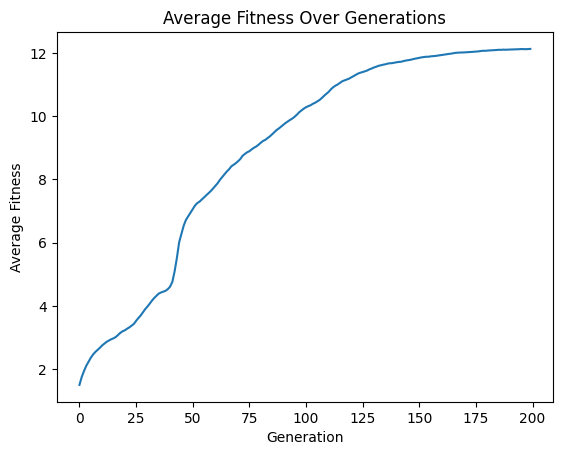

Eukaryotic organisms in final population: 100
Prokaryotic organisms in final population: 0


In [36]:
import matplotlib.pyplot as plt

final_population, fitness_over_time = simulate_evolution(population_size=100, generations=200, mutation_rate=0.01)

# Plot the average fitness over generations
plt.plot(fitness_over_time)
plt.title('Average Fitness Over Generations')
plt.xlabel('Generation')
plt.ylabel('Average Fitness')
plt.show()

# Analyze the final population
eukaryotes = sum([1 for org in final_population if org.cell_type == 'eukaryotic'])
prokaryotes = sum([1 for org in final_population if org.cell_type == 'prokaryotic'])

print(f"Eukaryotic organisms in final population: {eukaryotes}")
print(f"Prokaryotic organisms in final population: {prokaryotes}")
